<a href="https://colab.research.google.com/github/rojre1979/AI_References_2022/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Packages

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix

# 2. Load Data

In [2]:
data = pd.read_csv('/content/sample_data/breast_cancer_data_classification.csv')

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# write list of features we want to use
features = ["radius_mean",	"texture_mean",	"perimeter_mean",	"area_mean",	"smoothness_mean",	"compactness_mean",	"concavity_mean"]

# Set X
X = data[features]

In [8]:
# Set y
y = data["diagnosis"]

In [9]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980


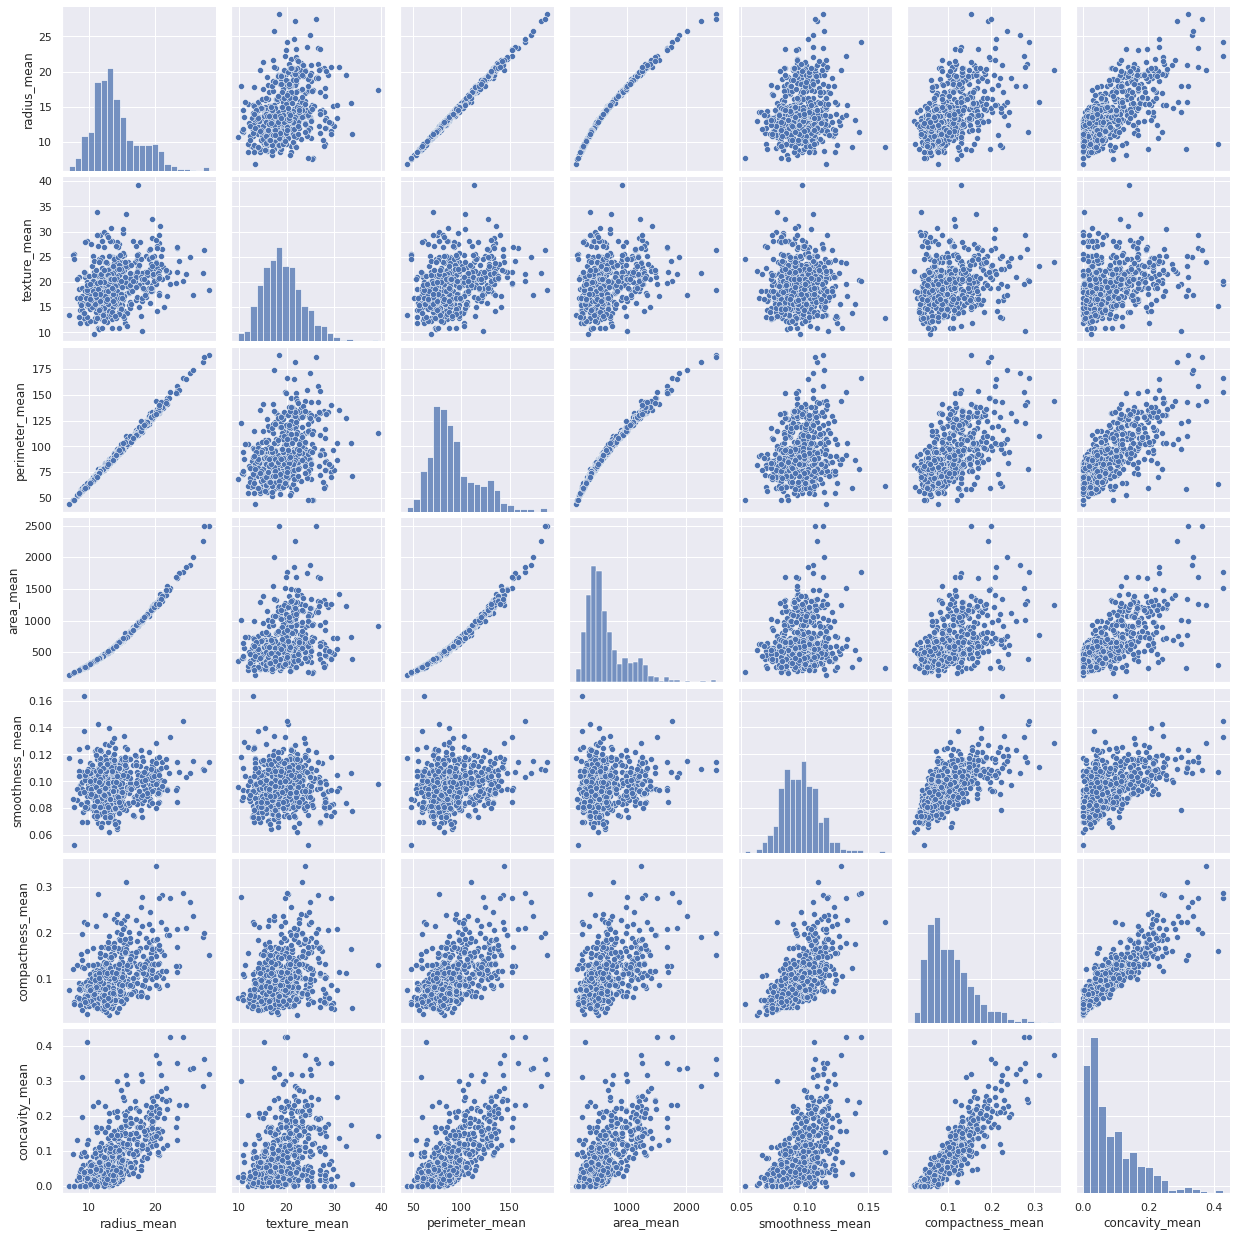

In [22]:
sns.pairplot(X)

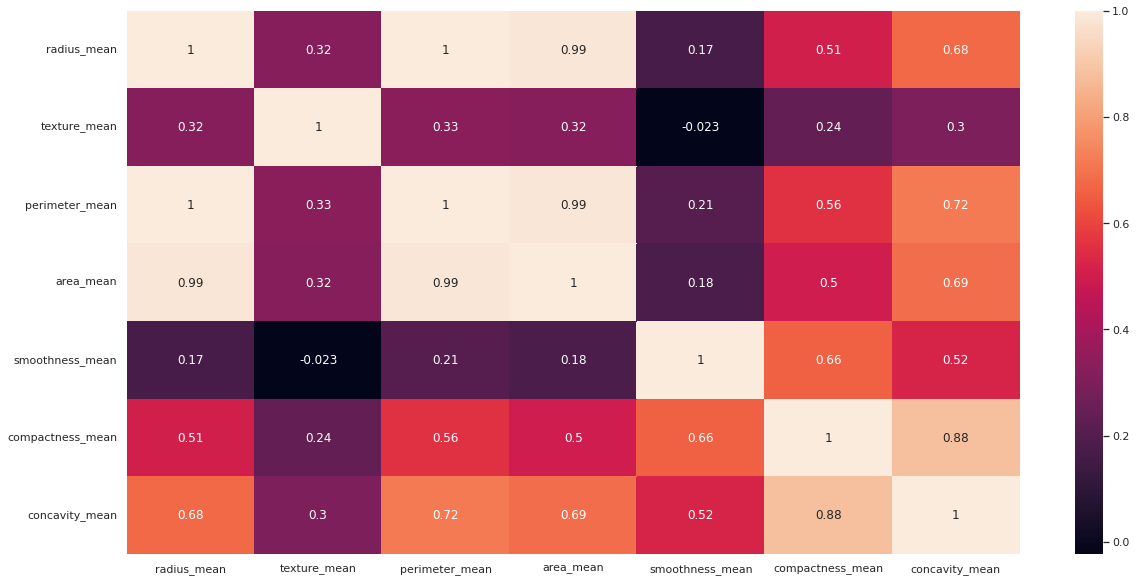

In [23]:
sns.heatmap(X.corr(),annot=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [11]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
# feature importance
log_reg.coef_

array([[-2.21072109,  0.21748298,  0.5528941 , -0.00627467,  0.33026721,
         0.6027067 ,  1.09296466]])

In [13]:
# accuracy
acc

0.9342105263157895

In [14]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[139,   9],
       [  6,  74]])

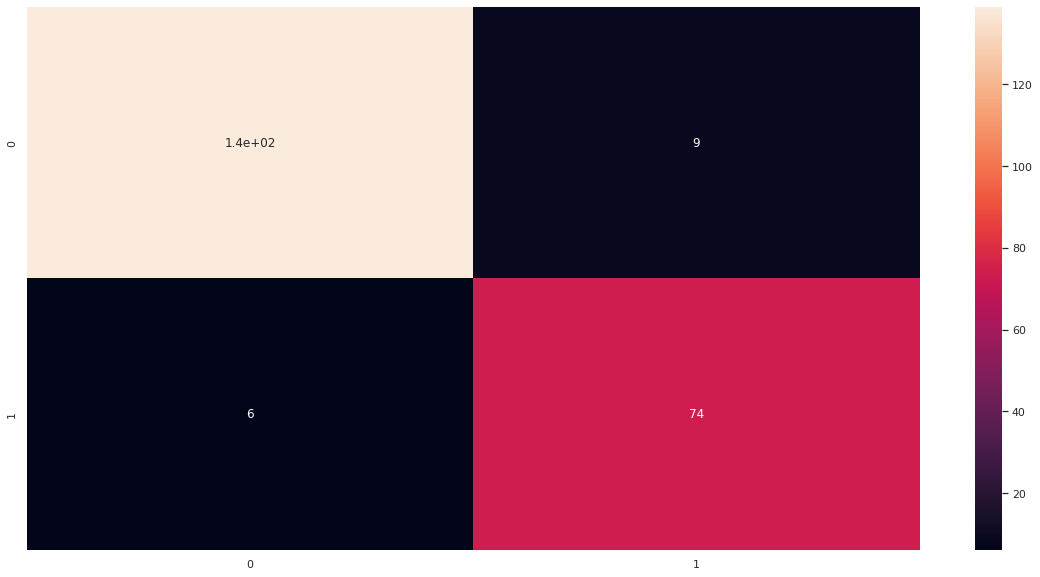

In [15]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [16]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       148
           M       0.89      0.93      0.91        80

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.93      0.93       228



# Predict on New Data

In [20]:
# ["radius_mean",	"texture_mean",	"perimeter_mean",	"area_mean",	"smoothness_mean",	"compactness_mean",	"concavity_mean"]
new_data = [[19.99,	15.38,	130.80,	1020.0,	0.12840,	0.25760,	0.4001]]

log_reg.predict(new_data) # 1 means the user will click, 0 means the user won't

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['M'], dtype=object)

In [21]:
acc

0.9342105263157895

### Comparing the predicted and test values

In [26]:
pd.DataFrame({"Predictions": y_pred, "Actual Labels": y_test})


,Predictions,Actual Labels
204,B,B
70,M,M
131,M,M
431,B,B
540,B,B
...,...,...
17,M,M
268,B,B
66,B,B
272,M,M
